# Producing merged clean cat

In [3]:
from xd import *
from utils import *
import esutil
import healpy as hp
from systematics import *
%matplotlib inline

%load_ext autoreload
%autoreload 2

figsave : figure/spatialtest_.png


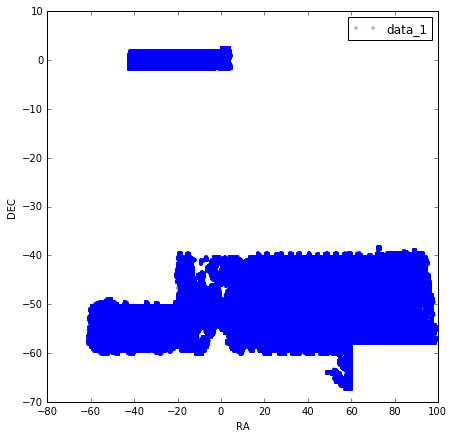

In [2]:
GoldMask = callingEliGoldMask()
spatialcheck(GoldMask)

In [4]:
des_gold_list = []
ra, ra2, dec, dec2 = [0, 50, -50, -48]

In [3]:
for i in range(3):
    des_gold = io.getDESY1A1catalogs(keyword = 'merged_'+str(i), gold=True)
    des_gold_list.append(des_gold)

Y1A1_GOLD_merged_01.fits
Y1A1_GOLD_merged_02.fits
Y1A1_GOLD_merged_03.fits
Y1A1_GOLD_merged_04.fits
Y1A1_GOLD_merged_05.fits
Y1A1_GOLD_merged_06.fits
Y1A1_GOLD_merged_07.fits
Y1A1_GOLD_merged_08.fits
Y1A1_GOLD_merged_09.fits


MemoryError: 

In [6]:
des_gold_list = np.hstack(des_gold_list)
mags = ['MAG_MODEL', 'MAG_DETMODEL', 'MAG_AUTO', 'MAG_APER_3', 'MAG_APER_4', 'MAG_APER_5', 'MAG_APER_6']
des_gold_list = getCorrectedMag( des_gold_list, mags = mags, reddening = None )
des_gold_list2 = Cuts.doBasicCuts(des_gold_list, raTag = 'RA', decTag='DEC', object = None)

no object selected. retrieve star + galaxy both
do Basic Cut 16992119


In [7]:
fitsio.write('result_cat/merged_des_patch3.fits', des_gold_list2, clobber = True)

In [2]:
fitsio.write('result_cat/merged_des_patch3_nocut.fits', des_gold_list)

NameError: name 'fitsio' is not defined

----

In [9]:
ls /n/des/lee.5922/data/gold_cat

merged_des_gold_basicCut00.fits  Y1A1_GOLD_HPIX_000007.fits
merged_des_gold_basicCut01.fits  Y1A1_GOLD_HPIX_000008.fits
merged_des_gold_basicCut02.fits  Y1A1_GOLD_HPIX_000009.fits
merged_des_gold_basicCut03.fits  Y1A1_GOLD_HPIX_000010.fits
merged_des_gold_basicCut04.fits  Y1A1_GOLD_HPIX_000011.fits
merged_des_gold_basicCut05.fits  Y1A1_GOLD_HPIX_000012.fits
merged_des_gold_basicCut06.fits  Y1A1_GOLD_HPIX_000013.fits
merged_des_gold_basicCut07.fits  Y1A1_GOLD_HPIX_000014.fits
merged_des_gold_basicCut08.fits  Y1A1_GOLD_HPIX_000015.fits
merged_des_gold_basicCut09.fits  Y1A1_GOLD_HPIX_000016.fits
merged_des_gold_basicCut10.fits  Y1A1_GOLD_HPIX_000017.fits
merged_des_gold_basicCut11.fits  Y1A1_GOLD_HPIX_000018.fits
merged_des_gold_basicCut12.fits  Y1A1_GOLD_merged_01.fits
merged_des_gold_basicCut13.fits  Y1A1_GOLD_merged_02.fits
merged_des_gold_basicCut14.fits  Y1A1_GOLD_merged_03.fits
merged_des_gold_basicCut15.fits  Y1A1_GOLD_merged_04.fits
merged_des_gold_basicCut16.fits  Y1A1_GOLD_merge

In [10]:
des_coadd = io.getDESY1A1catalogs(keyword = 'STRIPE82_COADD_OBJECTS', sdssmask=False)

STRIPE82_COADD_OBJECTS_00000.fits
STRIPE82_COADD_OBJECTS_00025.fits
STRIPE82_COADD_OBJECTS_00027.fits
STRIPE82_COADD_OBJECTS_00029.fits
STRIPE82_COADD_OBJECTS_00031.fits
STRIPE82_COADD_OBJECTS_00033.fits
STRIPE82_COADD_OBJECTS_00001.fits
STRIPE82_COADD_OBJECTS_00026.fits
STRIPE82_COADD_OBJECTS_00028.fits
STRIPE82_COADD_OBJECTS_00030.fits
STRIPE82_COADD_OBJECTS_00032.fits


In [11]:
des_gold = io.getDESY1A1catalogs(keyword = 'Y1A1_GOLD_STRIPE82_v2', gold=True)

Y1A1_GOLD_STRIPE82_v2_000001.fits
Y1A1_GOLD_STRIPE82_v2_000002.fits
Y1A1_GOLD_STRIPE82_v2_000003.fits
Y1A1_GOLD_STRIPE82_v2_000004.fits
Y1A1_GOLD_STRIPE82_v2_000005.fits
Y1A1_GOLD_STRIPE82_v2_000006.fits
Y1A1_GOLD_STRIPE82_v2_000007.fits
Y1A1_GOLD_STRIPE82_v2_000008.fits


In [14]:
coadd_gold_st82 = mergeCatalogsUsingPandas(des=des_coadd, gold=des_gold, how = 'inner', key='COADD_OBJECTS_ID',\
                                           suffixes = ['_coadd',''], left_index=False, right_index = False)

Big-endian buffer not supported on little-endian compiler
Doing byte swapping


In [16]:
des_coadd.size, des_gold.size, des_coadd.size + des_gold.size, coadd_gold_st82.size

(12487566, 12865253, 25352819, 11979881)

In [19]:
np.sum((des_gold['MODEST_CLASS'] == 1)&(des_gold['FLAGS_GOLD']==0)), \
np.sum((coadd_gold_st82['MODEST_CLASS'] == 1) &(coadd_gold_st82['FLAGS_GOLD']==0))

(9050359, 8386706)

In [20]:
fitsio.write('/n/des/lee.5922/data/gold_cat/coadd_gold_st82.fits', coadd_gold_st82)

## Test 

In [26]:
des_gold_list = []

In [27]:
mags = ['MAG_MODEL', 'MAG_DETMODEL', 'MAG_AUTO', 'MAG_APER_3', 'MAG_APER_4', 'MAG_APER_5', 'MAG_APER_6']

for i in range(1,21):
    des_gold = io.getDESY1A1catalogs(keyword = 'merged_{:02}'.format(i), gold=True)
    #des_gold = getCorrectedMag( des_gold, mags = mags, reddening = None )
    des_gold = Cuts.doBasicCuts(des_gold, raTag = 'RA', decTag='DEC', object = None)
    des_gold_list.append(des_gold)

Y1A1_GOLD_merged_01.fits
no object selected. retrieve star + galaxy both
do Basic Cut 1515132
Y1A1_GOLD_merged_02.fits
no object selected. retrieve star + galaxy both
do Basic Cut 2070320
Y1A1_GOLD_merged_03.fits
no object selected. retrieve star + galaxy both
do Basic Cut 2126095
Y1A1_GOLD_merged_04.fits
no object selected. retrieve star + galaxy both
do Basic Cut 2110625
Y1A1_GOLD_merged_05.fits
no object selected. retrieve star + galaxy both
do Basic Cut 2065037
Y1A1_GOLD_merged_06.fits
no object selected. retrieve star + galaxy both
do Basic Cut 2077602
Y1A1_GOLD_merged_07.fits
no object selected. retrieve star + galaxy both
do Basic Cut 1991975
Y1A1_GOLD_merged_08.fits
no object selected. retrieve star + galaxy both
do Basic Cut 1981171
Y1A1_GOLD_merged_09.fits
no object selected. retrieve star + galaxy both
do Basic Cut 1993488
Y1A1_GOLD_merged_10.fits
no object selected. retrieve star + galaxy both
do Basic Cut 1961178
Y1A1_GOLD_merged_11.fits
no object selected. retrieve star +

In [47]:
ls /n/des/lee.5922/data/gold_cat/

OSError: [Errno 12] Cannot allocate memory

In [49]:
objnum = 0
for i in range(len(des_gold_list)):
    #print des_gold_list[i]['DEC'].max(), des_gold_list[i]['DEC'].min()
    objnum += des_gold_list[i].size
    print objnum
    esutil.io.write( '/n/des/lee.5922/data/gold_cat/merged_des_gold_basicCut{:02}.fits'.format(i), des_gold_list[i],\
                    clobber=True )

1515132
3585452
5711547
7822172
9887209
11964811
13956786
15937957
17931445
19892623
21853894
23855129
25279041
26004741
26952342
28947282
30751270
32551100
33984217
34430520


In [34]:
des_gold_list = np.hstack(des_gold_list)

MemoryError: 

In [33]:
des_gold_list = np.hstack(des_gold_list)
import esutil
esutil.io.write( '/n/des/lee.5922/data/gold_cat/merged_des_gold_basicCut.fits', des_gold_list, combine=True )
#fitsio.write('gold_cat/merged_des_gold_basicCut.fits', des_gold_list)

ValueError: For list of array, send names=

In [ ]:
#STRIPE82_COADD_OBJECTS_00000.fits

#for i in range(3):
des_gold = io.getDESY1A1catalogs(keyword = 'STRIPE82_COADD_OBJECTS', sdssmask = False)